<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">


# Taller 04: Aprendizaje no supervisado.

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. Image K-means](#eje1)
2. [Ejercicio 2. Variedades de Trigo](#eje2)
3. [Ejercicio 3. AgglomerativeClustering](#eje3)
4. [Ejercicio 4. PCA + Nonsupervised](#eje4)





#### <font style="color: red"> Esta práctica contiene 4 ejercicios <!-- ONLY IN NOTEBOOK -->


In [3]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai-uis-student/talleres20201


In [4]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
np.random.seed(1201920704)

## <span style="color:green"> If you are in colaboratoy </span>: 

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/ai-uis-student/talleres20191
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/ai-uis-student/talleres20191'
/content
/content/drive/My Drive/ai-uis-student/talleres20201


<h2><span style="color:#FFF; background-color:#F00; font-weight:bold; padding:4px;">¡IMPORTANTE!</span></h2><br><h2 style="margin-top:-10px;">Usted debe ejecutar <span style="color:#F00;">TODAS</span> las celdas de tipo <span style="color:#F00;">CODE</span>. De lo contrario, sus respuestas no serán procesadas correctamente.</h2>

## Ejercicio 1 <a name="eje1"></a>

Escriba una función que se le pase como argumento una imagen `img` y dos diferentes valores para el número de clusters *K*: ` k_c1, k_c2`. La función debe calcular dos diferentes k-means con numero de centroides: ` k_c1, k_c2`, respectivamente. Las caracteristicas **X** para el entrenamiento, son: 
- El componente de color R   (se asume que es el canal 0)
- El componente de color G   (se asume que es el canal 1)
- El componente de color B   (se asume que es el canal 2)
- Los indices y de la imagen (valores en columnas)
- Los indices x de la imagen (valores en filas)
 
La función debe devolver el vector de etiquetas para el `kmeans(K_c1)`, el vector de etiquetas para el `kmeans(K_c2)` y sus respectivos estimadores ya entrenados. 
    

In [10]:
def img_seg(img, k_c1, k_c2):
    import numpy as np
    from skimage import io
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans 
    from sklearn.cluster import DBSCAN
    np.random.seed(1201920704)
    
    width, height = img.shape[0], img.shape[1]

    width, height = img.shape[0], img.shape[1]
    x=[]
    for i in range(height):
        x.append(range(width))

    y=[]
    for i in range(height):
        y.append(np.full(width,i))  
    
    x=np.array(x).reshape(width*height,1)
    y=np.array(y).reshape(width*height,1)
    Redcomp=img[:,:,0].reshape(width*height,1)
    Greencomp=img[:,:,1].reshape(width*height,1)
    Bluecomp=img[:,:,2].reshape(width*height,1)   
    
    X=np.concatenate((Redcomp,Greencomp,Bluecomp,y,x),axis=1)    
    k_c1 = KMeans(n_clusters=k_c1)
    k_c1.fit(X)  
    k_c2 = KMeans(n_clusters=k_c2)
    k_c2.fit(X)

    
    return k_c1.labels_, k_c2.labels_, k_c1, k_c2

#Colaboratory
import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(img_seg))

#Virtualbox
#import urllib, inspect
#src1 = urllib.quote_plus(inspect.getsource(img_seg))

Compruebe el resultado de la función con el siguiente código: 

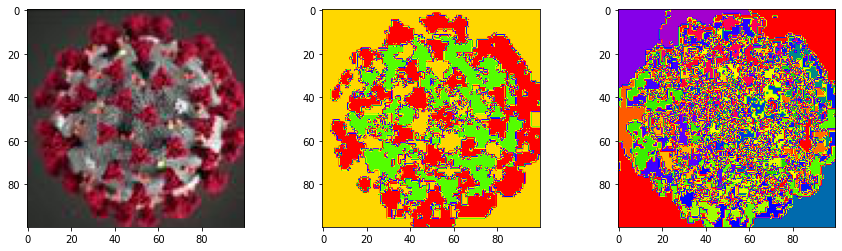

In [11]:
img = io.imread("misc/cor.jpg")
width, height = img.shape[0], img.shape[1]
kmeansLabels_c1, kmeansLabels_c2, k1, k2  = img_seg(img, k_c1=3, k_c2=30)

plt.figure(figsize=(15,4))
plt.subplot(131);
plt.imshow(img)
plt.subplot(132);
plt.imshow(kmeansLabels_c1.reshape(width, height), cmap = plt.cm.get_cmap('prism'));
plt.subplot(133);
plt.imshow(kmeansLabels_c2.reshape(width, height), cmap = plt.cm.get_cmap('prism'));


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [12]:
!./run CHECK_SOLUTION PS4_1 $src1

(100, 100, 3) (100, 100) (100, 100)
evaluation result CORRECT


##  Ejercicio 2 <a name="eje2"></a>

El dataset `misc/seeds-less-rows.csv` presenta un conjunto de caracteristicas que identifican 3 diferentes variedades de trigo. Escriba una función que carge este *dataset*, separe los datos en etiquetas (clases de semillas) y caracteristicas **X** y realice un agrupamiento utilizando el algoritmo **DBSCAN** y todas las caracteristicas.

La función debe: 
- **recibir** los parametros `epsilon`, `min_points` para fijar el algoritmo DBSCAN
- **devolver** un arreglo **numérico** con los etiquetas de las semillas. 
- **devolver** el vector de etiquetas resultado del DBSCAN
- **devolver** el respectivo estimador ya entrenado


In [13]:
def seeds_func(epsilon,min_points):
    import numpy as np
    import pandas as pd
    from sklearn.cluster import DBSCAN

    sem_df = pd.read_csv('misc/seeds-less-rows.csv')
    c = {'Rosa wheat': 1, 'Kama wheat': 0,'Canadian wheat':2}  
    sem_df.grain_variety.replace(c,inplace=True)
    class_int=sem_df.values[:,-1]
    X = sem_df.values[:,:-1]
    DBS = DBSCAN(eps=epsilon,min_samples=min_points)
    DBS.fit(X)
      
    return class_int, DBS.labels_, DBS

#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(seeds_func))

#Virtualbox
#import urllib, inspect
#src2 = urllib.quote_plus(inspect.getsource(seeds_func))

Compruebe su código aquí. 

In [15]:
sem_df = pd.read_csv('misc/seeds-less-rows.csv')
X = sem_df.values
sem_df.head(5)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


(42, 8)


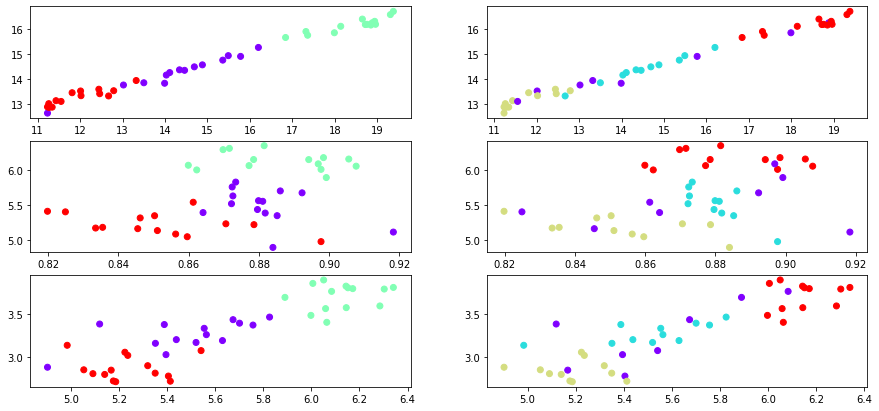

In [20]:
sem_df = pd.read_csv('misc/seeds-less-rows.csv')
X = sem_df.values
print( X.shape)
class_int, labels, DBS =seeds_func(epsilon= 1.2,min_points=3)

plt.figure(figsize=(15,7))
plt.subplot(321);
plt.scatter(X[:,0],X[:,1], c=class_int, cmap='rainbow') 
plt.subplot(322);
plt.scatter(X[:,0],X[:,1], c=labels, cmap='rainbow') 
plt.subplot(323);
plt.scatter(X[:,2],X[:,3], c=class_int, cmap='rainbow') 
plt.subplot(324);
plt.scatter(X[:,2],X[:,3], c=labels, cmap='rainbow') 
plt.subplot(325);
plt.scatter(X[:,3],X[:,4], c=class_int, cmap='rainbow') 
plt.subplot(326);
plt.scatter(X[:,3],X[:,4], c=labels, cmap='rainbow') 

 

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta

In [21]:
!./run CHECK_SOLUTION PS4_2 $src2

evaluation result CORRECT


##  Ejercicio 3 <a name="eje3"></a>

Existen muchos otros métodos para agrupar caracteristicas y aplicar el principio de algoritmos no supervisados. Escriba una función que explore el método de agrupamiento agrlometarivo (`AgglomerativeClustering`) sobre el dataset de `sklearn` que se denomina `make_gaussian_quantiles`. La función debe: 

- **recibir** los parametros `num_clusters` para fijar el algoritmo  `AgglomerativeClustering`
- **devolver** los puntos generados por el dataset `make_gaussian_quantiles`
- **devolver** las etiquetas de los puntos
- **devolver** el vector de etiquetas resultado del `AgglomerativeClustering`
- **devolver** el respectivo estimador ya entrenado

En cuanto al dataset `make_gaussian_quantiles` genere puntos con los siguientes parametros.

- 500 elementos
- 2 caracteristicas



Referencia Gaussian quantiles [ https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html ] <br>

In [22]:
def agg_func(num_clusters):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.datasets import make_gaussian_quantiles
    X,y = make_gaussian_quantiles(n_samples=500, n_features=2)
    aggc = AgglomerativeClustering(n_clusters=num_clusters)
    aggc.fit(X)
    class_init = y
    print(aggc.labels_)
    return X, class_init, aggc.labels_, aggc

#Colaboratory
import urllib.parse, inspect
src3 = urllib.parse.quote_plus(inspect.getsource(agg_func))

#Virtualbox
#import urllib, inspect
#src3 = urllib.quote_plus(inspect.getsource(ac_func))

[0 2 1 0 2 0 2 1 1 0 1 2 1 1 2 2 2 1 1 1 2 1 0 0 0 2 0 2 2 0 1 0 2 0 0 0 0
 0 1 0 0 0 1 2 2 1 0 0 0 2 0 1 0 0 0 2 0 2 2 0 0 2 1 0 0 1 0 0 2 1 1 2 0 0
 2 0 2 1 2 0 0 1 1 2 2 0 0 0 2 0 0 0 1 0 1 0 1 2 1 0 2 0 2 2 0 1 1 0 0 1 2
 0 0 0 2 2 2 2 0 0 1 0 1 1 2 0 1 1 1 0 0 1 0 0 1 2 0 0 1 1 1 0 0 1 2 2 0 0
 0 1 1 0 0 1 1 2 1 0 1 2 0 1 2 1 0 0 2 1 0 2 0 2 1 0 0 1 1 2 1 0 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 2 1 1 1 2 0 0 2 0 0 1 0 0 1 0 1 2 1 0 0 0 0 1 2 0 0
 0 2 1 0 1 1 0 0 1 0 0 1 1 1 2 0 2 0 0 0 0 0 0 0 0 2 2 1 0 0 1 2 0 1 1 2 2
 1 0 0 2 1 0 0 2 1 1 0 1 2 1 2 2 0 2 0 2 2 1 2 1 1 1 0 0 0 2 2 1 2 1 0 2 0
 1 2 0 0 1 0 2 1 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 1 0 0 2 0 0 2 2 2 1 0 2 2
 0 0 0 2 2 1 0 1 0 0 1 2 2 0 2 2 0 1 2 0 0 1 1 2 0 1 0 1 1 1 0 2 2 2 0 2 2
 0 1 2 0 0 0 1 2 0 2 2 2 1 0 0 2 1 0 0 0 1 0 0 0 2 0 0 1 0 0 2 2 0 2 0 1 0
 1 1 1 1 1 0 2 0 2 1 0 2 2 1 0 2 1 1 1 0 0 0 0 1 0 2 0 0 0 2 0 0 2 2 0 1 0
 0 0 0 2 1 0 1 0 2 0 1 2 0 0 1 2 2 1 2 2 2 2 1 0 0 1 1 1 1 2 2 2 0 0 0 2 1
 0 0 1 0 1 2 0 0 0 0 2 2 

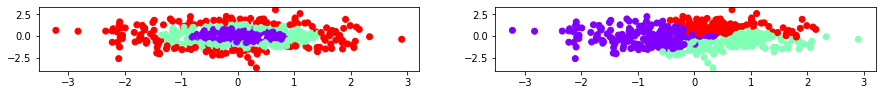

In [23]:
X, class_int, labels, ac =agg_func(num_clusters=3)

plt.figure(figsize=(15,4))
plt.subplot(321);
plt.scatter(X[:,0],X[:,1], c=class_int, cmap='rainbow') 
plt.subplot(322);
plt.scatter(X[:,0],X[:,1], c=labels, cmap='rainbow') 
#plt.subplot(323);
#plt.scatter(X[:,2],X[:,3], c=class_int, cmap='rainbow') 
#plt.subplot(324);
#plt.scatter(X[:,2],X[:,3], c=labels, cmap='rainbow') 
#plt.subplot(325);
#plt.scatter(X[:,3],X[:,4], c=class_int, cmap='rainbow') 
#plt.subplot(326);
#plt.scatter(X[:,3],X[:,4], c=labels, cmap='rainbow') 


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [24]:
!./run CHECK_SOLUTION PS4_3 $src3

[5 8 2 1 1 2 7 2 4 4 8 5 1 8 0 7 4 4 2 2 1 4 5 0 2 4 7 8 0 3 7 0 1 5 6 0 0
 1 0 4 3 0 6 9 5 5 3 7 0 5 8 3 3 1 0 1 5 0 7 7 4 1 5 5 3 3 7 2 9 0 0 5 7 1
 1 0 0 8 4 0 0 3 0 5 0 4 7 0 3 6 0 3 1 8 3 1 4 4 0 0 1 1 1 5 2 0 5 6 5 6 5
 0 9 6 8 6 6 0 9 2 2 5 4 9 8 3 4 2 1 6 5 0 6 5 5 7 1 0 5 1 4 6 0 0 3 9 5 0
 5 3 3 5 0 1 3 4 0 5 4 0 1 9 3 2 6 4 5 0 0 5 6 1 2 4 6 3 8 1 8 1 3 7 0 0 1
 7 0 9 2 0 3 1 0 3 0 1 7 7 7 0 6 0 5 4 1 2 2 8 4 7 3 8 3 0 4 1 8 7 6 2 0 9
 0 0 2 1 0 0 2 3 1 0 0 5 4 1 0 3 7 5 0 0 8 5 0 0 4 5 4 5 6 1 0 0 4 3 4 1 0
 1 2 3 5 0 1 3 4 1 0 3 0 4 5 4 1 7 2 0 1 1 4 0 1 4 1 2 4 0 1 4 3 0 8 0 8 7
 4 0 3 6 3 9 0 6 0 0 0 0 1 5 1 1 3 4 4 1 4 4 3 4 4 4 4 0 8 2 8 9 4 0 7 8 0
 3 4 9 3 4 7 6 1 9 1 0 5 9 0 5 6 0 5 1 1 0 6 0 4 7 0 3 1 2 3 9 1 0 0 8 4 2
 5 4 0 1 2 6 0 1 3 0 4 0 7 1 4 1 4 4 6 7 5 1 1 5 1 5 5 1 0 4 0 0 6 4 4 5 7
 3 8 2 8 0 3 0 0 3 3 4 8 4 1 0 8 8 4 8 0 5 0 3 8 5 4 1 4 5 4 4 3 5 0 0 0 5
 0 0 1 4 4 4 4 9 0 0 5 7 1 5 4 6 8 3 1 8 5 4 0 1 4 1 8 1 0 2 1 5 9 0 5 0 5
 0 1 1 8 1 8 7 8 0 7 1 0 

##  Ejercicio 4 <a name="eje4"></a>

Cuando se tienen datos n-dimensionales, uno de los mas grandes desafios es su visualización para el análisis y la toma de decisiones. Un método empleado es la reducción n-dimensional usadando el PCA. También estos métodos nos permiten reducir el espacio de busqueda para los algoritmos de agrupamiento, pudiendo obtener mejores resultados. 

Implemente una función que reciba como parametros `epsilon, min_points, k_centroids, P_comp` para el ajuste de un algoritmo DBSCAN, el K-means y los componentes del PCA. La función debe calcular los `P_comp` componentes del PCA del dataset de `sklearn` que se denomina `make_gaussian_quantiles`. 


. Una vez obtenido los  `P_comp` componentes, transforme todas sus caracteristicas hacia estos componentes, es decir, ahora tendra unicamente  `P_comp` caracteristicas. Utilizando estas *PCA-features* entrene un Kmeans(clusters =k_centroids) y un DBSCAN(epsilon, min_points). 

La función debe devolver: 
- **devolver** los puntos de `make_gaussian_quantiles` pero **transformados** por el PCA
- **devolver** las etiquetas de los puntos
- **devolver**El vector de  etiquetas del kmeans
- **devolver** El vector de  etiquetas del DBSCAN
- **devolver** Los objetos entrenados KMEANS, BDSCAN y  PCA

En cuanto al dataset `make_gaussian_quantiles` genere puntos con los siguientes parametros.

- 1000 elementos
- 20 caracteristicas
- 5 clases


In [25]:
def pca_and_clustering(epsilon=0.2,min_points=3, k_centroids=5,P_comp=2 ):
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans
    from sklearn.datasets import make_gaussian_quantiles
    np.random.seed(1201920704)
    
    X,y = make_gaussian_quantiles(n_samples=1000, n_features=20, n_classes=5)
    pca = PCA(n_components=P_comp)
    pca = pca.fit(X)
    X = pca.transform(X)

    DBS = DBSCAN(eps=epsilon, min_samples=min_points)
    kmeans = KMeans(n_clusters=k_centroids) 

    DBS.fit(X)
    kmeans.fit(X)

    klabels_ = kmeans.labels_
    Dlabels_ = DBS.labels_
    
    return X,y, klabels_, Dlabels_, kmeans, DBS, p

#Colaboratory
import urllib.parse, inspect
src4 = urllib.parse.quote_plus(inspect.getsource(pca_and_clustering))

#Virtualbox
#import urllib, inspect
#src4 = urllib.quote_plus(inspect.getsource(pca_and_clustering))

Compruebe su función aquí: 

In [26]:
X,y, kmeans_labels, DBS_labels, KMEANS_, DBS_, PCA_ =pca_and_clustering(epsilon= 0.4,min_points=15, k_centroids=5, P_comp=3)

plt.figure(figsize=(15,4))
plt.subplot(131);
plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow') 
plt.subplot(132);
plt.scatter(X[:,0],X[:,1], c=kmeans_labels, cmap='rainbow') 
plt.subplot(133);
plt.scatter(X[:,0],X[:,1], c=DBS_labels, cmap='rainbow') 


NameError: ignored

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [ ]:
!./run CHECK_SOLUTION PS4_4 $src4

evaluation result CORRECT


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#Colaboratory
import urllib.parse, inspect
taller = urllib.parse.quote_plus("Taller_04_20201_AlgNoSupervisados")
codigo = urllib.parse.quote_plus("tl4_2172016")

#Virtualbox
#import urllib, inspect
#taller = urllib.quote_plus("Taller_04_20201_AlgNoSupervisados")
#codigo = urllib.quote_plus("tl4_12345")

print(taller, codigo)

Taller_04_20201_AlgNoSupervisados tl4_2172016


#### 2. Guarde los cambios del taller:

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [ ]:
!./convert_ipynb.sh $codigo $taller

uno: tl4_12345 dos Taller_04_20192_AlgNoSupervisados
¡PERFECTO!, el archivo   'tl4_12345.ipynb'   se creó correctamente :D


---
<img src="../imgs/bannerThanks.jpg" style="width:1000px;">